In [18]:
#https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "uciml/red-wine-quality-cortez-et-al-2009",
    "winequality-red.csv", 
)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    average_precision_score,
    precision_recall_curve
)

from sklearn.inspection import permutation_importance


In [19]:
df.shape

(1599, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


There is no missing values

- residual suger
  min=0.9, 75%=0.75 2.6, max=15.5 -> there might be outlier
  
- chlorides
    75%=0.09, max=0.611 -> there might be outlier
- total sulfur dioxide
    75%=62, max=289 -> big outlier

In [23]:
#target
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

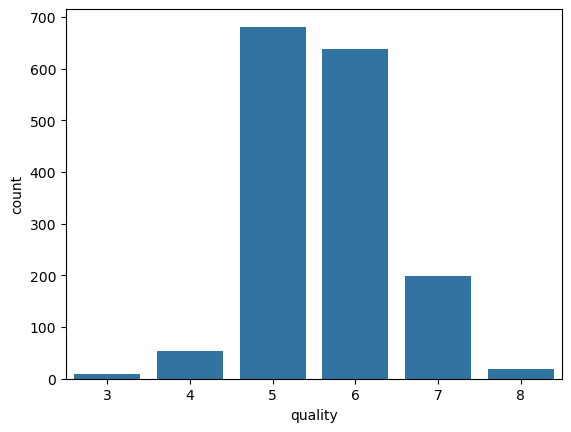

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=df)
plt.show()

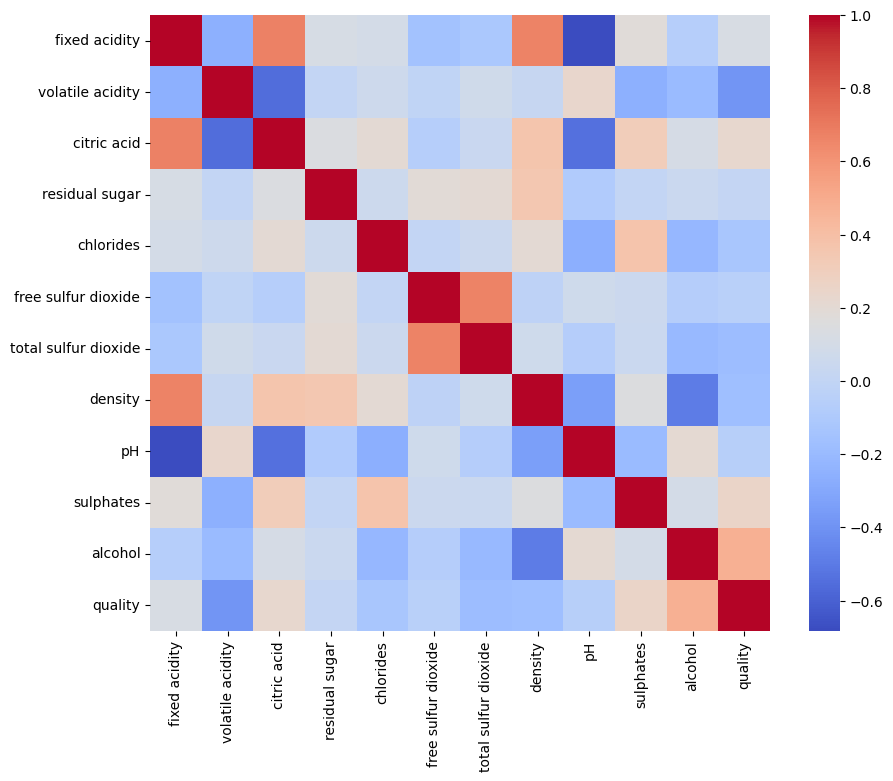

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

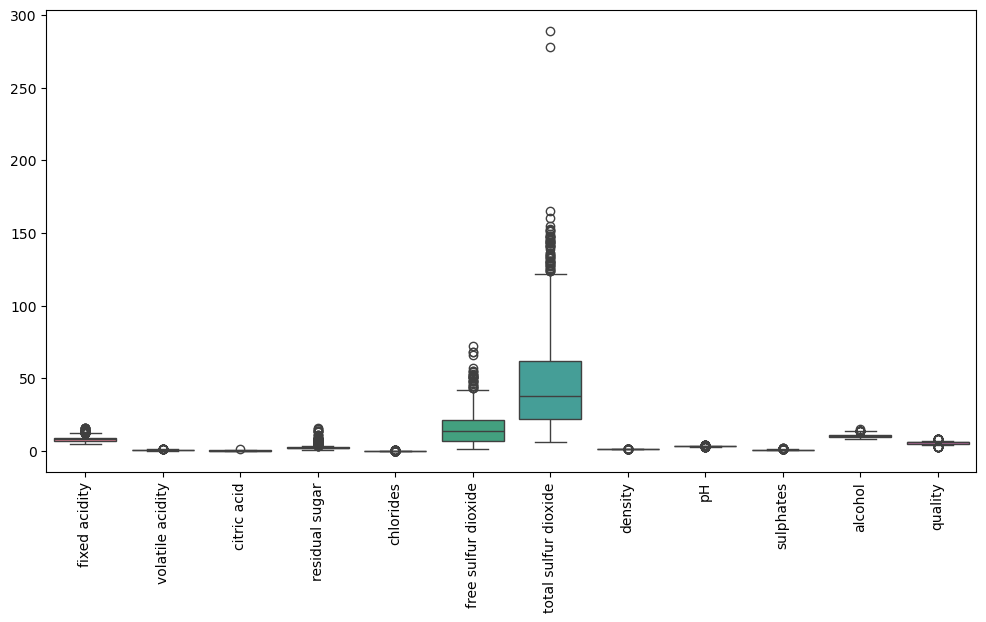

In [26]:
#plot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [27]:
#change it to binary

df['target'] = (df['quality'] >= 7).astype(int)

In [28]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [31]:
# Class distribution check (portfolio-friendly)

print("Class distribution (train):")
display(pd.Series(y_train).value_counts(normalize=True).rename("ratio"))

print("\nClass distribution (test):")
display(pd.Series(y_test).value_counts(normalize=True).rename("ratio"))

Class distribution (train):


target
0    0.863956
1    0.136044
Name: ratio, dtype: float64


Class distribution (test):


target
0    0.865625
1    0.134375
Name: ratio, dtype: float64

In [32]:
def plot_confusion(y_true, y_pred, title: str):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(title)
    plt.show()

def plot_roc_pr_curves(y_true, y_proba, title_prefix: str):
    # ROC-AUC
    roc_auc = roc_auc_score(y_true, y_proba)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
    plt.plot([0,1], [0,1], "--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"{title_prefix} - ROC Curve")
    plt.legend()
    plt.show()

    # PR-AUC
    pr_auc = average_precision_score(y_true, y_proba)
    prec, rec, thr = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(5,5))
    plt.plot(rec, prec, label=f"PR (AP={pr_auc:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{title_prefix} - Precision-Recall Curve")
    plt.legend()
    plt.show()

    print(f"{title_prefix} ROC-AUC: {roc_auc:.4f}")
    print(f"{title_prefix} PR-AUC : {pr_auc:.4f}")

    # threshold tuning (NOTE: Ideally do this on validation set, not test)
    f1_proxy = (2 * prec * rec) / (prec + rec + 1e-12)
    best_idx = np.nanargmax(f1_proxy)
    best_thr = thr[best_idx-1] if best_idx > 0 and (best_idx-1) < len(thr) else 0.5
    print(f"{title_prefix} best threshold (F1 proxy on PR curve): {best_thr:.3f}")
    return best_thr


Baseline: Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       277
           1       0.70      0.37      0.48        43

    accuracy                           0.89       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.88      0.89      0.88       320



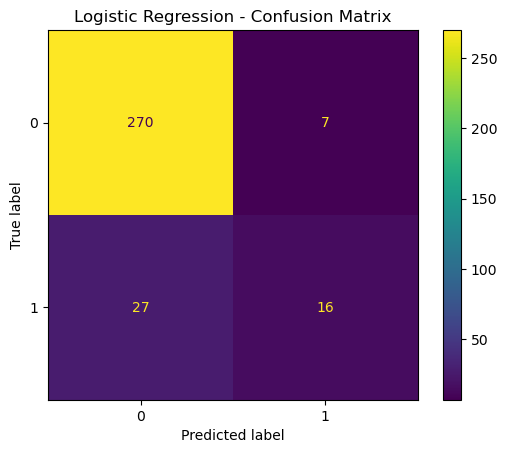

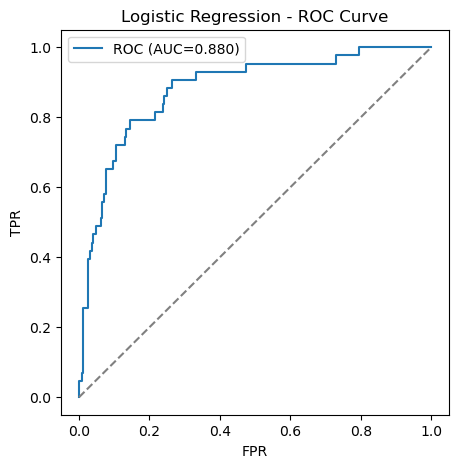

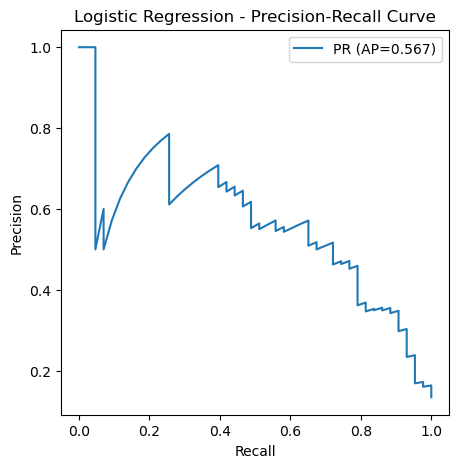

Logistic Regression ROC-AUC: 0.8804
Logistic Regression PR-AUC : 0.5668
Logistic Regression best threshold (F1 proxy on PR curve): 0.287

[Analysis] Logistic Regression with tuned threshold
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       277
           1       0.56      0.65      0.60        43

    accuracy                           0.88       320
   macro avg       0.75      0.79      0.77       320
weighted avg       0.89      0.88      0.89       320



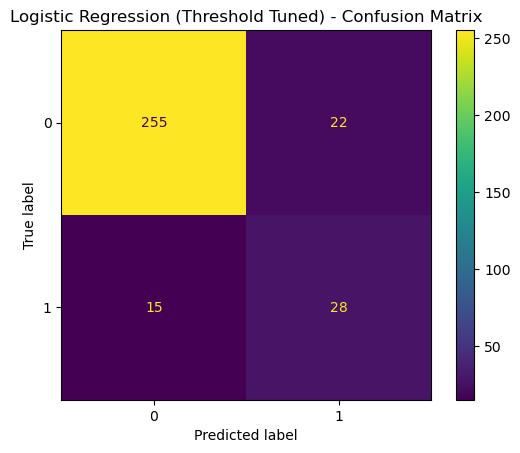

In [35]:
# Baseline Model: Logistic Regression
# Your baseline used StandardScaler + LogisticRegression(max_iter=1000) 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("\nBaseline: Logistic Regression")
print(classification_report(y_test, y_pred_lr))
plot_confusion(y_test, y_pred_lr, "Logistic Regression - Confusion Matrix")
best_thr_lr = plot_roc_pr_curves(y_test, y_proba_lr, "Logistic Regression")

# optional: show thresholded prediction (for analysis)
y_pred_lr_thr = (y_proba_lr >= best_thr_lr).astype(int)
print("\n[Analysis] Logistic Regression with tuned threshold")
print(classification_report(y_test, y_pred_lr_thr))
plot_confusion(y_test, y_pred_lr_thr, "Logistic Regression (Threshold Tuned) - Confusion Matrix")



Improved Baseline: Weighted Logistic Regression (class_weight='balanced')
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       277
           1       0.40      0.79      0.53        43

    accuracy                           0.81       320
   macro avg       0.68      0.80      0.71       320
weighted avg       0.89      0.81      0.84       320



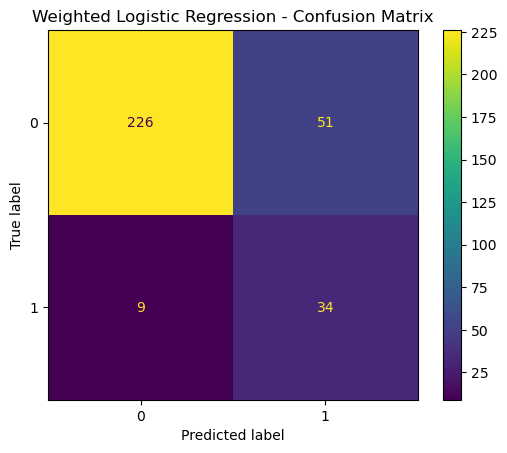

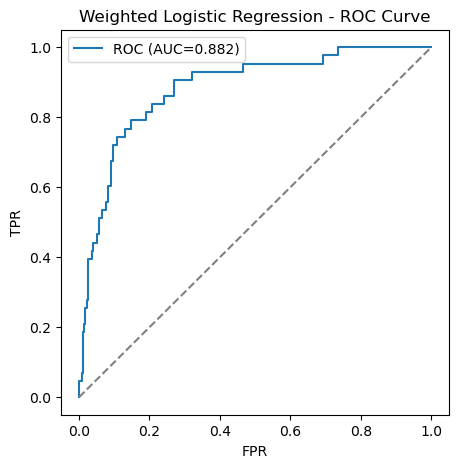

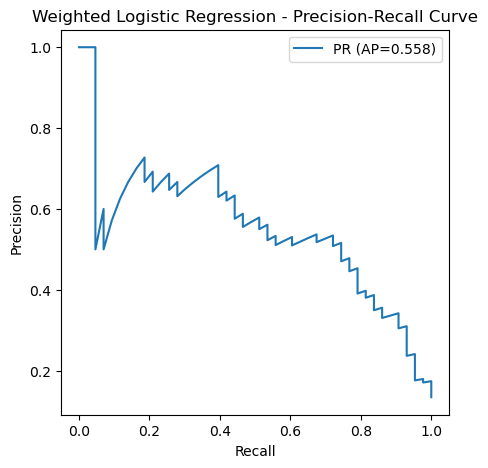

Weighted Logistic Regression ROC-AUC: 0.8824
Weighted Logistic Regression PR-AUC : 0.5581
Weighted Logistic Regression best threshold (F1 proxy on PR curve): 0.656


In [36]:
# Baseline Improvement: class_weight="balanced"
lr_w = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
lr_w.fit(X_train_scaled, y_train)

y_pred_lrw = lr_w.predict(X_test_scaled)
y_proba_lrw = lr_w.predict_proba(X_test_scaled)[:, 1]

print("\nImproved Baseline: Weighted Logistic Regression (class_weight='balanced')")
print(classification_report(y_test, y_pred_lrw))
plot_confusion(y_test, y_pred_lrw, "Weighted Logistic Regression - Confusion Matrix")
_ = plot_roc_pr_curves(y_test, y_proba_lrw, "Weighted Logistic Regression")



Model: RandomForest (baseline)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.93      0.63      0.75        43

    accuracy                           0.94       320
   macro avg       0.94      0.81      0.86       320
weighted avg       0.94      0.94      0.94       320



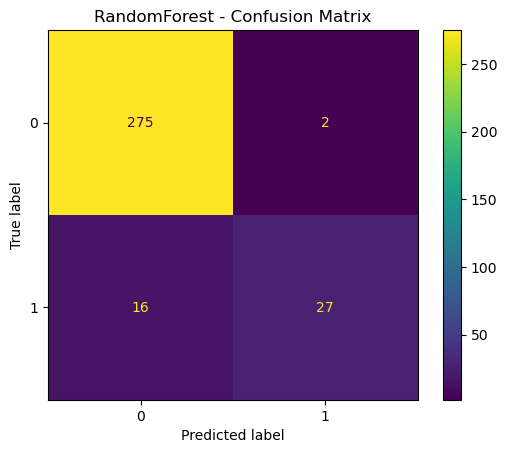

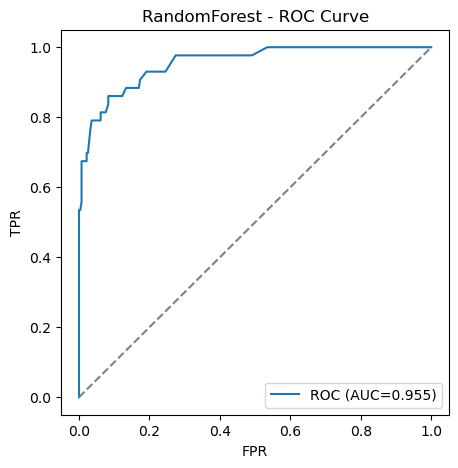

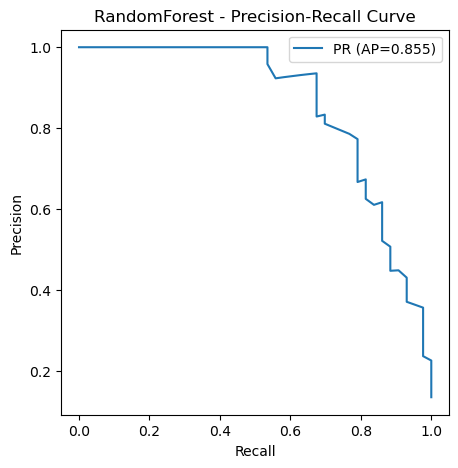

RandomForest ROC-AUC: 0.9553
RandomForest PR-AUC : 0.8550
RandomForest best threshold (F1 proxy on PR curve): 0.460


In [37]:
# RandomForest (same as your notebook + richer eval)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("\nModel: RandomForest (baseline)")
print(classification_report(y_test, y_pred_rf))
plot_confusion(y_test, y_pred_rf, "RandomForest - Confusion Matrix")
_ = plot_roc_pr_curves(y_test, y_proba_rf, "RandomForest")


CV (RandomForest baseline)
accuracy: 0.8882 ± 0.0167
f1: 0.4775 ± 0.0909
recall: 0.3787 ± 0.0794
precision: 0.6497 ± 0.1075
roc_auc: 0.8899 ± 0.0231
avg_precision: 0.6217 ± 0.0877

GridSearch Best RandomForest
Best params: {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Best CV f1: 0.5667453821522189

Best RF: Test Performance
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.77      0.70      0.73        43

    accuracy                           0.93       320
   macro avg       0.86      0.83      0.85       320
weighted avg       0.93      0.93      0.93       320



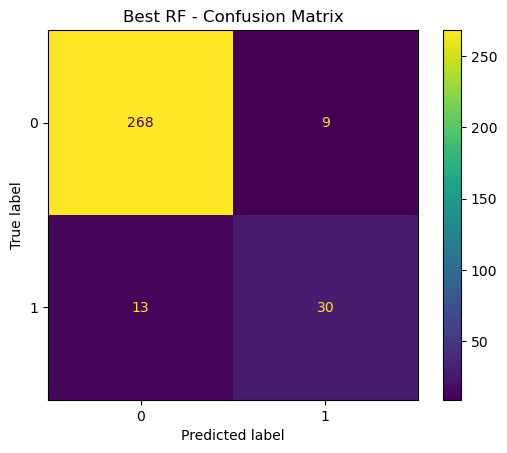

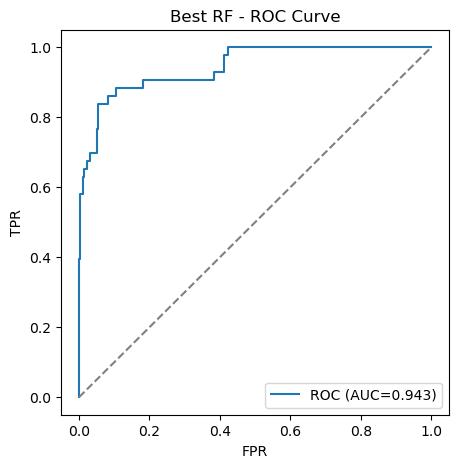

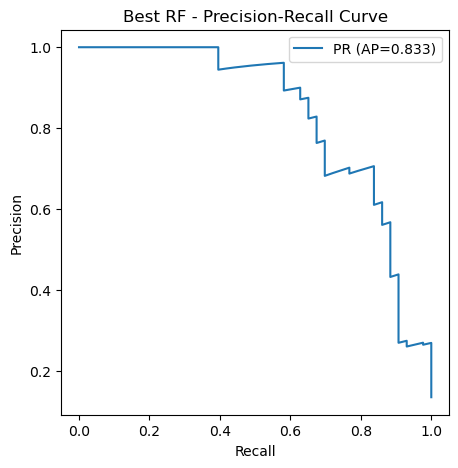

Best RF ROC-AUC: 0.9435
Best RF PR-AUC : 0.8327
Best RF best threshold (F1 proxy on PR curve): 0.341


In [38]:
# Cross Validation + GridSearch 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "recall": "recall",
    "precision": "precision",
    "roc_auc": "roc_auc",
    "avg_precision": "average_precision",
}

rf_base = RandomForestClassifier(random_state=42)
cv_result = cross_validate(rf_base, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)

print("\nCV (RandomForest baseline)")
for k, v in cv_result.items():
    if k.startswith("test_"):
        print(f"{k.replace('test_','')}: {np.mean(v):.4f} ± {np.std(v):.4f}")

param_grid = {
    "n_estimators": [200, 500],
    "max_depth": [None, 6, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "class_weight": [None, "balanced"],
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring="f1",     
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_

print("\nGridSearch Best RandomForest")
print("Best params:", grid.best_params_)
print("Best CV f1:", grid.best_score_)

y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

print("\nBest RF: Test Performance")
print(classification_report(y_test, y_pred_best))
plot_confusion(y_test, y_pred_best, "Best RF - Confusion Matrix")
_ = plot_roc_pr_curves(y_test, y_proba_best, "Best RF")

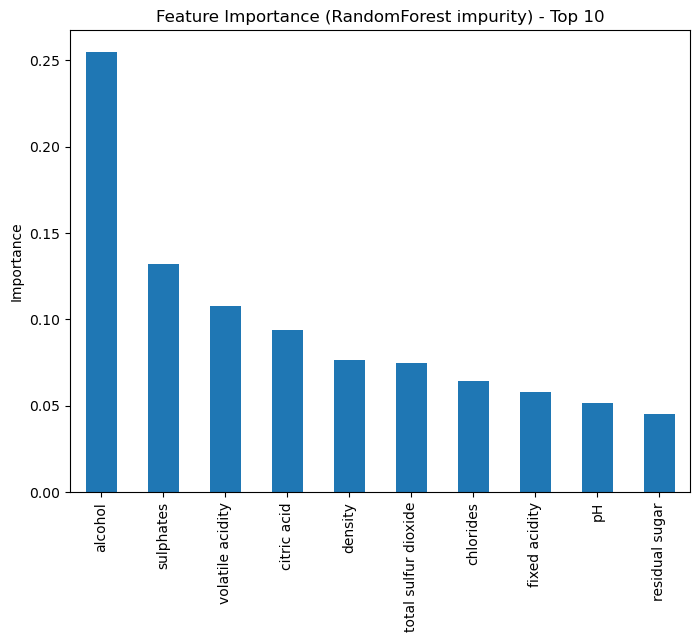

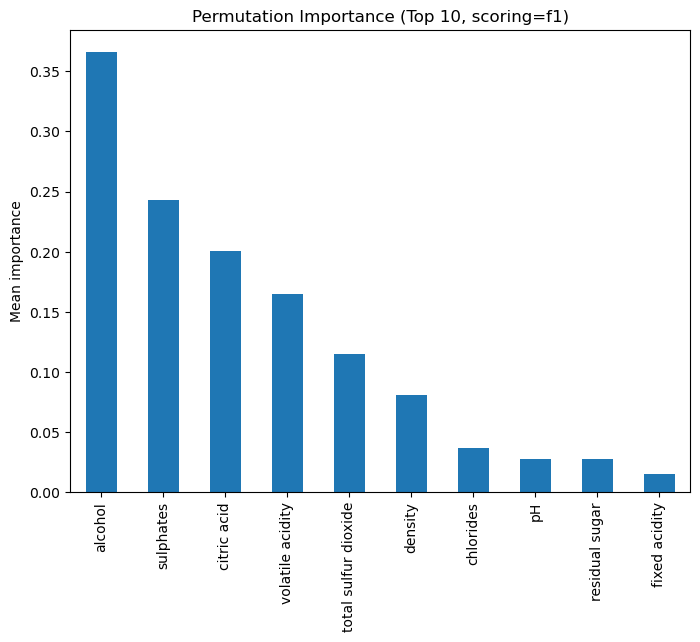

In [40]:
# Feature Importance (impurity-based) + Permutation Importance

imp = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
imp.head(10).plot(kind="bar")
plt.title("Feature Importance (RandomForest impurity) - Top 10")
plt.ylabel("Importance")
plt.show()

perm = permutation_importance(
    estimator=best_rf,
    X=X_test,
    y=y_test,
    n_repeats=20,
    random_state=42,
    n_jobs=-1,
    scoring="f1"
)
perm_imp = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
perm_imp.head(10).plot(kind="bar")
plt.title("Permutation Importance (Top 10, scoring=f1)")
plt.ylabel("Mean importance")
plt.show()


In [41]:
# Error Analysis 

test_df = X_test.copy()
test_df["y_true"] = y_test.values
test_df["y_pred"] = y_pred_best

fn = test_df[(test_df["y_true"] == 1) & (test_df["y_pred"] == 0)]
fp = test_df[(test_df["y_true"] == 0) & (test_df["y_pred"] == 1)]

print("\nError Analysis")
print("False Negatives (missed good wines):", len(fn))
display(fn.head(10))

print("False Positives (wrongly predicted good):", len(fp))
display(fp.head(10))


Error Analysis
False Negatives (missed good wines): 13


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_true,y_pred
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1,0
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,1,0
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,1,0
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,1,0
1125,8.8,0.240,0.35,1.7,0.055,13.0,27.0,0.99394,3.14,0.59,11.3,1,0
855,7.6,0.735,0.02,2.5,0.071,10.0,14.0,0.99538,3.51,0.71,11.7,1,0
1075,9.1,0.250,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2,1,0
873,9.1,0.210,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,1,0
1494,6.4,0.310,0.09,1.4,0.066,15.0,28.0,0.99459,3.42,0.70,10.0,1,0
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,1,0


False Positives (wrongly predicted good): 9


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,y_true,y_pred
1472,7.6,0.35,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,0,1
241,12.0,0.38,0.56,2.1,0.093,6.0,24.0,0.99925,3.14,0.71,10.9,0,1
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,0,1
372,9.1,0.28,0.48,1.8,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,0,1
1267,10.4,0.43,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.4,0,1
432,11.9,0.37,0.69,2.3,0.078,12.0,24.0,0.99580,3.00,0.65,12.8,0,1
347,13.8,0.49,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,0,1
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,0,1
1302,9.1,0.37,0.32,2.1,0.064,4.0,15.0,0.99576,3.30,0.80,11.2,0,1


Exception ignored in: <function ResourceTracker.__del__ at 0x104c51bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1078a9bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105155bc0>
Traceback (most recent call last